# Cat V/S Dog Classification Model

TRANSFER LEARNING:
Transfer Learning is a deep learning technique where we use a pre-trained model. This pre-trained model is trained for one task 
and can be re-trained for a similar task with a smaller dataset.

In this classification we will be using transfer learning by utilizing the Mobilnet Model as our pre-trained model.

# Extracting Dataset from Kaggle API

In [1]:
#installing kaggle library
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Cat V/S Dog Kaggle API

In [6]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:10<00:00, 84.3MB/s]
100% 812M/812M [00:10<00:00, 81.4MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
import os
#counting the number of files in Train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('Number of images:',file_count)

Number of images: 25000


Printing Name of Images

In [13]:
file_name=os.listdir('/content/train')
print(file_name)

['cat.5459.jpg', 'cat.2992.jpg', 'cat.7112.jpg', 'dog.11000.jpg', 'cat.8404.jpg', 'dog.10180.jpg', 'cat.2142.jpg', 'dog.5850.jpg', 'dog.12217.jpg', 'dog.2409.jpg', 'dog.4513.jpg', 'cat.5581.jpg', 'dog.9971.jpg', 'dog.11055.jpg', 'cat.150.jpg', 'cat.1260.jpg', 'cat.94.jpg', 'cat.8626.jpg', 'cat.10830.jpg', 'cat.5698.jpg', 'dog.6649.jpg', 'cat.7364.jpg', 'cat.696.jpg', 'cat.12053.jpg', 'cat.10347.jpg', 'cat.9430.jpg', 'dog.9132.jpg', 'dog.8055.jpg', 'dog.455.jpg', 'dog.11471.jpg', 'dog.1484.jpg', 'cat.2031.jpg', 'dog.9997.jpg', 'dog.4909.jpg', 'cat.8305.jpg', 'dog.2171.jpg', 'dog.749.jpg', 'cat.9035.jpg', 'cat.7512.jpg', 'cat.7747.jpg', 'dog.2949.jpg', 'cat.484.jpg', 'cat.8880.jpg', 'cat.11870.jpg', 'dog.11185.jpg', 'cat.726.jpg', 'cat.1306.jpg', 'dog.8081.jpg', 'dog.11751.jpg', 'cat.9134.jpg', 'cat.1159.jpg', 'dog.11285.jpg', 'cat.11150.jpg', 'dog.4207.jpg', 'dog.3434.jpg', 'cat.2014.jpg', 'cat.7091.jpg', 'cat.3158.jpg', 'cat.10768.jpg', 'cat.3337.jpg', 'cat.8896.jpg', 'cat.3173.jpg', '

Importing Dependencies

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

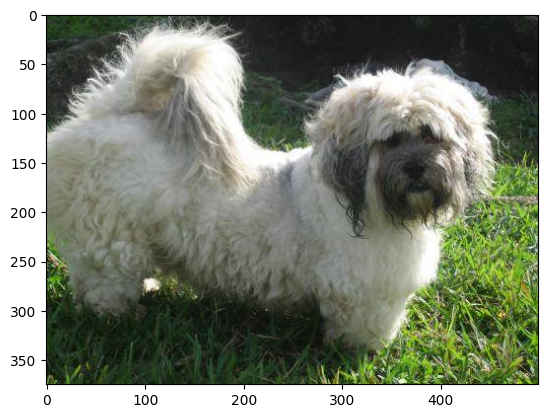

In [17]:
#Display Dog image
img=mpimg.imread('/content/train/dog.11000.jpg')
imgplt=plt.imshow(img)
plt.show()

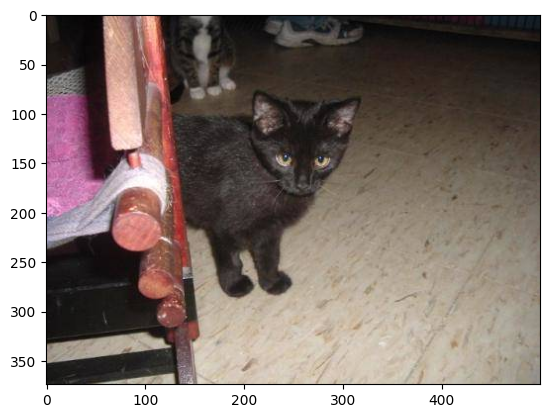

In [18]:
#Display Cat image
img=mpimg.imread('/content/train/cat.2142.jpg')
imgplt=plt.imshow(img)
plt.show()

In [19]:
file_names=os.listdir('/content/train')

for i in range(5):
  img=file_name[i]
  name=img[0:3]
  print(name)

cat
cat
cat
dog
cat


In [20]:
file_names=os.listdir('/content/train')
dog_count=0
cat_count=0
for img in file_names:
  name=img[0:3]
  if(name=='cat'):
    cat_count+=1
  else:
    dog_count+=1
print('Number of cats:',cat_count)
print('Number of dogs:',dog_count)

Number of cats: 12500
Number of dogs: 12500


# Resizing All images

In [21]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [22]:
original_folder='/content/train/'
resized_folder='/content/image resized/'
for i in range(2000):
  file_name=os.listdir(original_folder)[i]
  img_path=original_folder+file_name

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+file_name
  img.save(newImgPath)

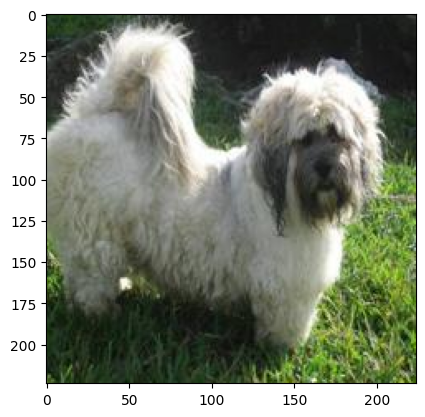

In [24]:
#displaying the resized dog image
img=mpimg.imread('/content/image resized/dog.11000.jpg')
imgplt=plt.imshow(img)
plt.show()

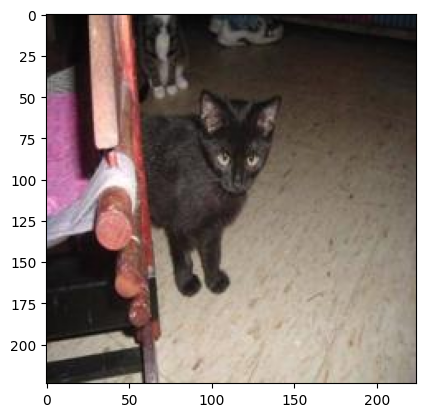

In [25]:
#displaying the resized dog image
img=mpimg.imread('/content/image resized/cat.2142.jpg')
imgplt=plt.imshow(img)
plt.show()

CREATING LABELS

Cat->0

Dog->1

In [30]:
labels=[]
filename=os.listdir('/content/image resized')
for i in range(2000):
    file_name=filename[i]
    name=file_name[0:3]
    if (name=='dog'):
      labels.append(1)
    else:
      labels.append(0)


In [31]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [32]:
#counting the images of dog and cat
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1009  991]


Converting the resized images into numpy array

In [33]:
import cv2
import glob

In [34]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [35]:
print(dog_cat_images)

[[[[198 204 215]
   [202 208 219]
   [191 197 210]
   ...
   [200 215 241]
   [199 214 240]
   [203 218 244]]

  [[198 204 215]
   [207 213 224]
   [200 206 219]
   ...
   [202 217 243]
   [202 217 243]
   [205 220 246]]

  [[205 211 222]
   [202 208 219]
   [202 210 223]
   ...
   [203 218 244]
   [204 219 245]
   [207 222 248]]

  ...

  [[239 231 232]
   [229 221 222]
   [224 217 220]
   ...
   [230 226 237]
   [231 227 238]
   [231 227 238]]

  [[233 222 224]
   [219 211 212]
   [216 207 210]
   ...
   [228 224 235]
   [229 225 236]
   [231 227 238]]

  [[239 228 230]
   [225 214 216]
   [215 206 209]
   ...
   [225 221 232]
   [226 222 233]
   [228 224 235]]]


 [[[ 66  74  73]
   [ 63  71  70]
   [ 86  91  90]
   ...
   [ 28  26 149]
   [ 28  23 154]
   [ 27  23 158]]

  [[ 71  79  78]
   [ 67  75  74]
   [ 90  95  94]
   ...
   [ 32  31 147]
   [ 31  27 152]
   [ 29  25 154]]

  [[ 70  78  77]
   [ 64  72  71]
   [ 85  90  89]
   ...
   [ 37  35 141]
   [ 35  30 145]
   [ 32  28

In [36]:
type(dog_cat_images)

numpy.ndarray

In [37]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [38]:
X=dog_cat_images
Y=np.asarray(labels)

# Train Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600->training images

400->test images

SCALING THE DATASET

In [41]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [42]:
print(X_train_scaled)

[[[[0.28235294 0.23529412 0.18823529]
   [0.35686275 0.30980392 0.2627451 ]
   [0.44313725 0.40392157 0.36470588]
   ...
   [0.23921569 0.21960784 0.20784314]
   [0.25490196 0.24313725 0.22745098]
   [0.26666667 0.25490196 0.23921569]]

  [[0.25882353 0.21176471 0.16470588]
   [0.33333333 0.28627451 0.23921569]
   [0.42352941 0.38431373 0.34509804]
   ...
   [0.23921569 0.21960784 0.20784314]
   [0.25882353 0.24705882 0.23137255]
   [0.27058824 0.25882353 0.24313725]]

  [[0.25490196 0.20784314 0.16078431]
   [0.32941176 0.28235294 0.23529412]
   [0.41960784 0.38039216 0.34117647]
   ...
   [0.24313725 0.22352941 0.21176471]
   [0.2627451  0.25098039 0.23529412]
   [0.2745098  0.2627451  0.24705882]]

  ...

  [[0.22352941 0.25490196 0.25490196]
   [0.22352941 0.25490196 0.25490196]
   [0.21960784 0.25098039 0.25098039]
   ...
   [0.72156863 0.66666667 0.61960784]
   [0.73333333 0.67843137 0.63137255]
   [0.67843137 0.62352941 0.57647059]]

  [[0.20392157 0.23529412 0.23529412]
   [0.2

# MODEL BUILDING

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilnet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilnet_model,input_shape=(224,224,3),trainable=False)

In [46]:
num_classes=2

model=tf.keras.Sequential([

  pretrained_model,
  tf.keras.layers.Dense(num_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']

)

In [49]:
model.fit(X_train_scaled,Y_train,epochs=6)

Epoch 1/6
50/50 [==============================] - 35s 628ms/step - loss: 0.2865 - acc: 0.8775
Epoch 2/6
50/50 [==============================] - 32s 634ms/step - loss: 0.0795 - acc: 0.9731
Epoch 3/6
50/50 [==============================] - 34s 678ms/step - loss: 0.0581 - acc: 0.9812
Epoch 4/6
50/50 [==============================] - 46s 914ms/step - loss: 0.0418 - acc: 0.9881
Epoch 5/6
50/50 [==============================] - 32s 643ms/step - loss: 0.0348 - acc: 0.9906
Epoch 6/6
50/50 [==============================] - 31s 620ms/step - loss: 0.0297 - acc: 0.9925


In [50]:
model.evaluate(X_test_scaled,Y_test)

13/13 [==============================] - 8s 561ms/step - loss: 0.0724 - acc: 0.9700


[0.07238849252462387, 0.9700000286102295]

# PREDICTIVE SYSTEM

Path of the image to be predicted:/content/dog_img.jpg


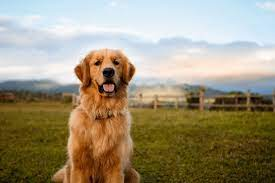

1/1 [==============================] - 0s 429ms/step
The image represents a Dog


In [51]:
input_image_path=input('Path of the image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted:/content/cat_img.jpeg


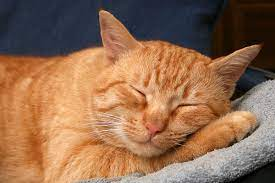

1/1 [==============================] - 0s 56ms/step
The image represents a Cat


In [52]:
input_image_path=input('Path of the image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')


# THANK YOU!